In [439]:
import pandas as pd
import yaml

In [440]:
path = 'data/raw/'

In [441]:
result_yaml_file_path = 'results/'

# Produciton Category

In [442]:
production_df = pd.read_csv(path + 'Production_Category.csv')
production_df = production_df[['REF_DATE', 'GEO', 'North American Industry Classification System (NAICS)', 'VALUE']]
#times the empolyment by 1000 to make the unit to 1 person
production_df['VALUE'] = production_df['VALUE'] * 1000
production_df.rename(columns={'VALUE': 'Employment', 'REF_DATE':'Year'}, inplace=True)
production_df

,Year,GEO,North American Industry Classification System (NAICS),Employment
0,2001,Canada,"Total employed, all industries",14932300.0
1,2001,Canada,Goods-producing sector,3766400.0
2,2001,Canada,"Agriculture [111-112, 1100, 1151-1152]",322600.0
3,2001,Canada,"Forestry, fishing, mining, quarrying, oil and ...",276400.0
4,2001,Canada,Utilities [22],122800.0
...,...,...,...,...
28875,2020,"Northeast, British Columbia",Health care and social assistance [62],3800.0
28876,2020,"Northeast, British Columbia","Information, culture and recreation [51, 71]",NaN
28877,2020,"Northeast, British Columbia",Accommodation and food services [72],2200.0
28878,2020,"Northeast, British Columbia",Other services (except public administration) ...,2500.0


# Smoking

In [443]:
smoking_df = pd.read_excel(path + 'Smoke_Average.xlsx')
smoking_df.rename(columns={'Unnamed: 0':'GEO'}, inplace=True)
melted_smoke_df = pd.melt(smoking_df, id_vars=['GEO'], var_name='Year', value_name='Smoke_per_day')

In [444]:
melted_smoke_df['Year'] = melted_smoke_df['Year'].astype(int)

In [445]:
melted_smoke_df.head()

,GEO,Year,Smoke_per_day
0,Canada,1999,17.4
1,British Columbia,1999,16.1
2,Alberta,1999,16.2
3,Saskatchewan,1999,16.0
4,Manitoba,1999,15.8


# Population

In [446]:
population_df = pd.read_csv(path + 'population.csv', encoding='latin-1')
population_df.rename(columns={'ï»¿"REF_DATE"': 'Year', 'VALUE': 'Population'}, inplace=True)

In [447]:
population_df = population_df[population_df['Year'].str.contains('-10')]
population_df['Year'] = population_df['Year'].str.replace('-10', '')
population_df['Year'] = population_df['Year'].astype(int)

In [448]:
population_df = population_df[['Year', 'GEO', 'Population']]

In [449]:
population_df.head()

,Year,GEO,Population
3,1999,Canada,30492106
7,2000,Canada,30783969
11,2001,Canada,31128873
15,2002,Canada,31450677
19,2003,Canada,31736141


# Lung Cancer Rate

In [450]:
mortality_df = pd.read_csv(path + 'Lung_Cancer.csv')
mortality_df = mortality_df[mortality_df['UOM'] == 'Rate per 100,000 population']
mortality_df.rename(columns={'REF_DATE': 'Year', 'VALUE': 'Lung_Cancer_Rate'}, inplace=True) 
# the rate is Cancer incidence rate per 100,000 population, all age, both sexes
mortality_df = mortality_df[['Year', 'GEO', 'Lung_Cancer_Rate']]

In [451]:
mortality_df.head()

,Year,GEO,Lung_Cancer_Rate
24,1997,Canada,63.1
25,1998,Canada,65.5
26,1999,Canada,65.9
27,2000,Canada,65.7
28,2001,Canada,66.7


# Calculating the employment rate in each industry

In [452]:
merged_df = pd.merge(production_df, population_df, on=['Year', 'GEO'], how='left')

In [453]:
merged_df = merged_df.dropna(subset=['Population'])

In [454]:
import numpy as np
merged_df['Employment_Ratio'] = merged_df['Employment'] / merged_df['Population'] * 100000
# The Employment_Ratio of population is per 100,000

In [455]:
# merged the smoke data
merged_df = pd.merge(merged_df, melted_smoke_df, on=['Year', 'GEO'], how='left')

In [456]:
# merged the lung cancer rate data
merged_df = pd.merge(merged_df, mortality_df, on=['Year', 'GEO'], how='left')

In [457]:
merged_df.rename(columns={'North American Industry Classification System (NAICS)': 'NAICS'}, inplace=True)
merged_df = merged_df[merged_df['GEO']!='Canada'] # drop Canada data

In [458]:
merged_df['Population'] = merged_df['Population']/100000 

In [459]:
merged_df

,Year,GEO,NAICS,Employment,Population,Employment_Ratio,Smoke_per_day,Lung_Cancer_Rate
19,2001,Newfoundland and Labrador,"Total employed, all industries",203700.0,5.21583,39054.186965,16.7,48.8
20,2001,Newfoundland and Labrador,Goods-producing sector,43500.0,5.21583,8339.995744,16.7,48.8
21,2001,Newfoundland and Labrador,"Agriculture [111-112, 1100, 1151-1152]",1000.0,5.21583,191.724040,16.7,48.8
22,2001,Newfoundland and Labrador,"Forestry, fishing, mining, quarrying, oil and ...",14000.0,5.21583,2684.136561,16.7,48.8
23,2001,Newfoundland and Labrador,Utilities [22],2400.0,5.21583,460.137696,16.7,48.8
...,...,...,...,...,...,...,...,...
4175,2020,British Columbia,Health care and social assistance [62],307300.0,51.73896,5939.431330,14.4,64.2
4176,2020,British Columbia,"Information, culture and recreation [51, 71]",102800.0,51.73896,1986.897301,14.4,64.2
4177,2020,British Columbia,Accommodation and food services [72],163100.0,51.73896,3152.363325,14.4,64.2
4178,2020,British Columbia,Other services (except public administration) ...,100400.0,51.73896,1940.510594,14.4,64.2


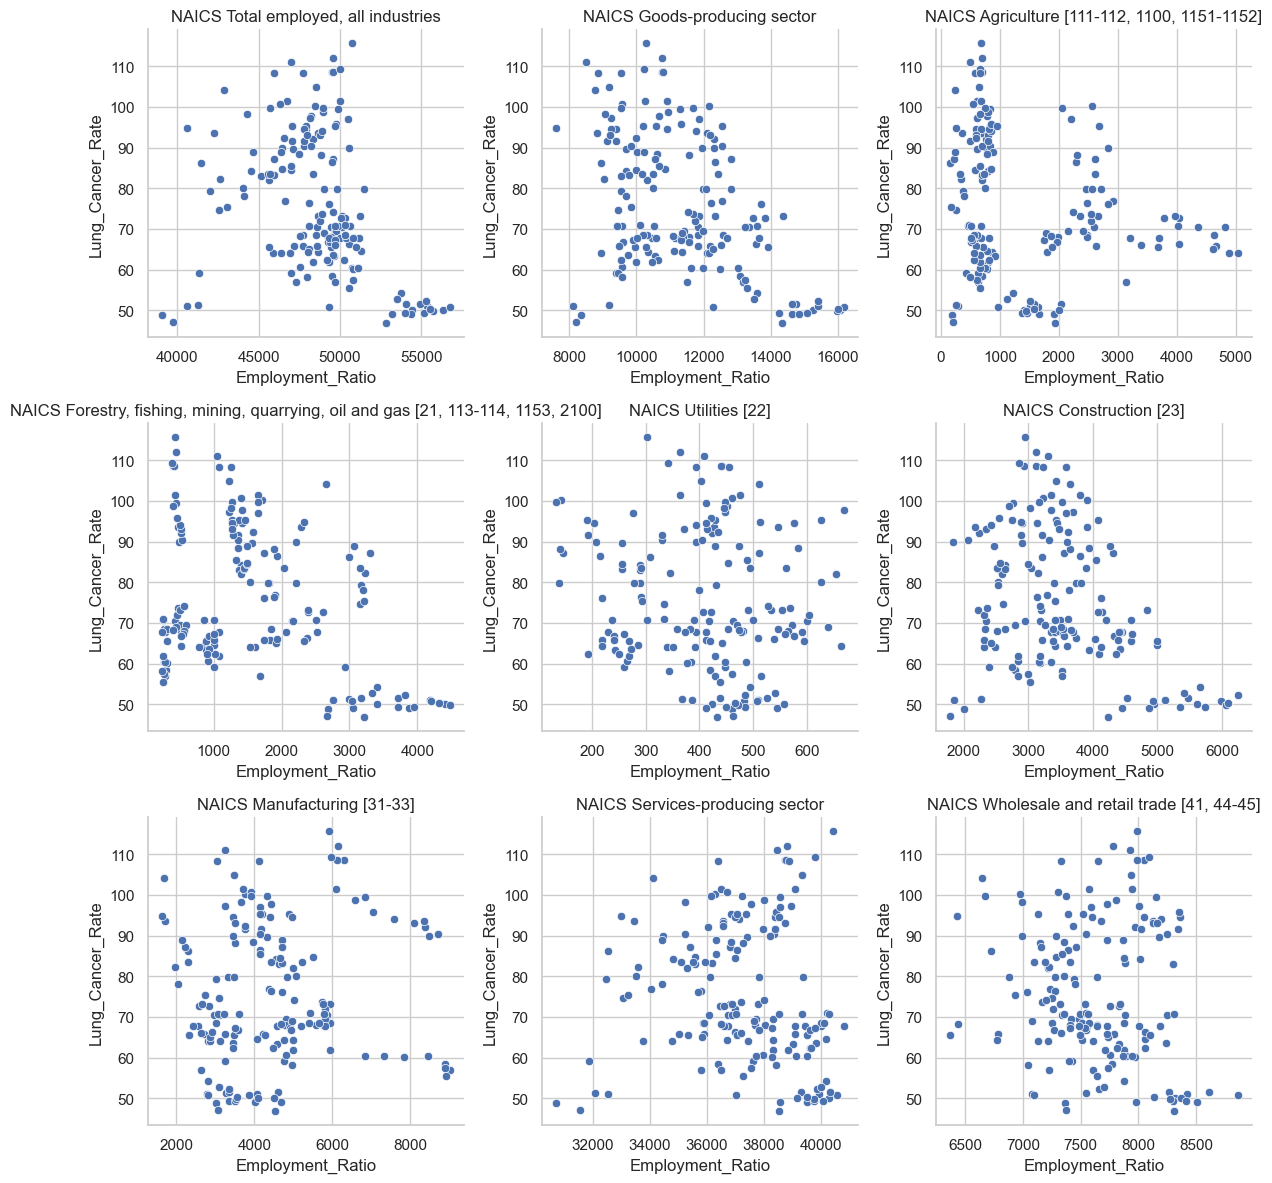

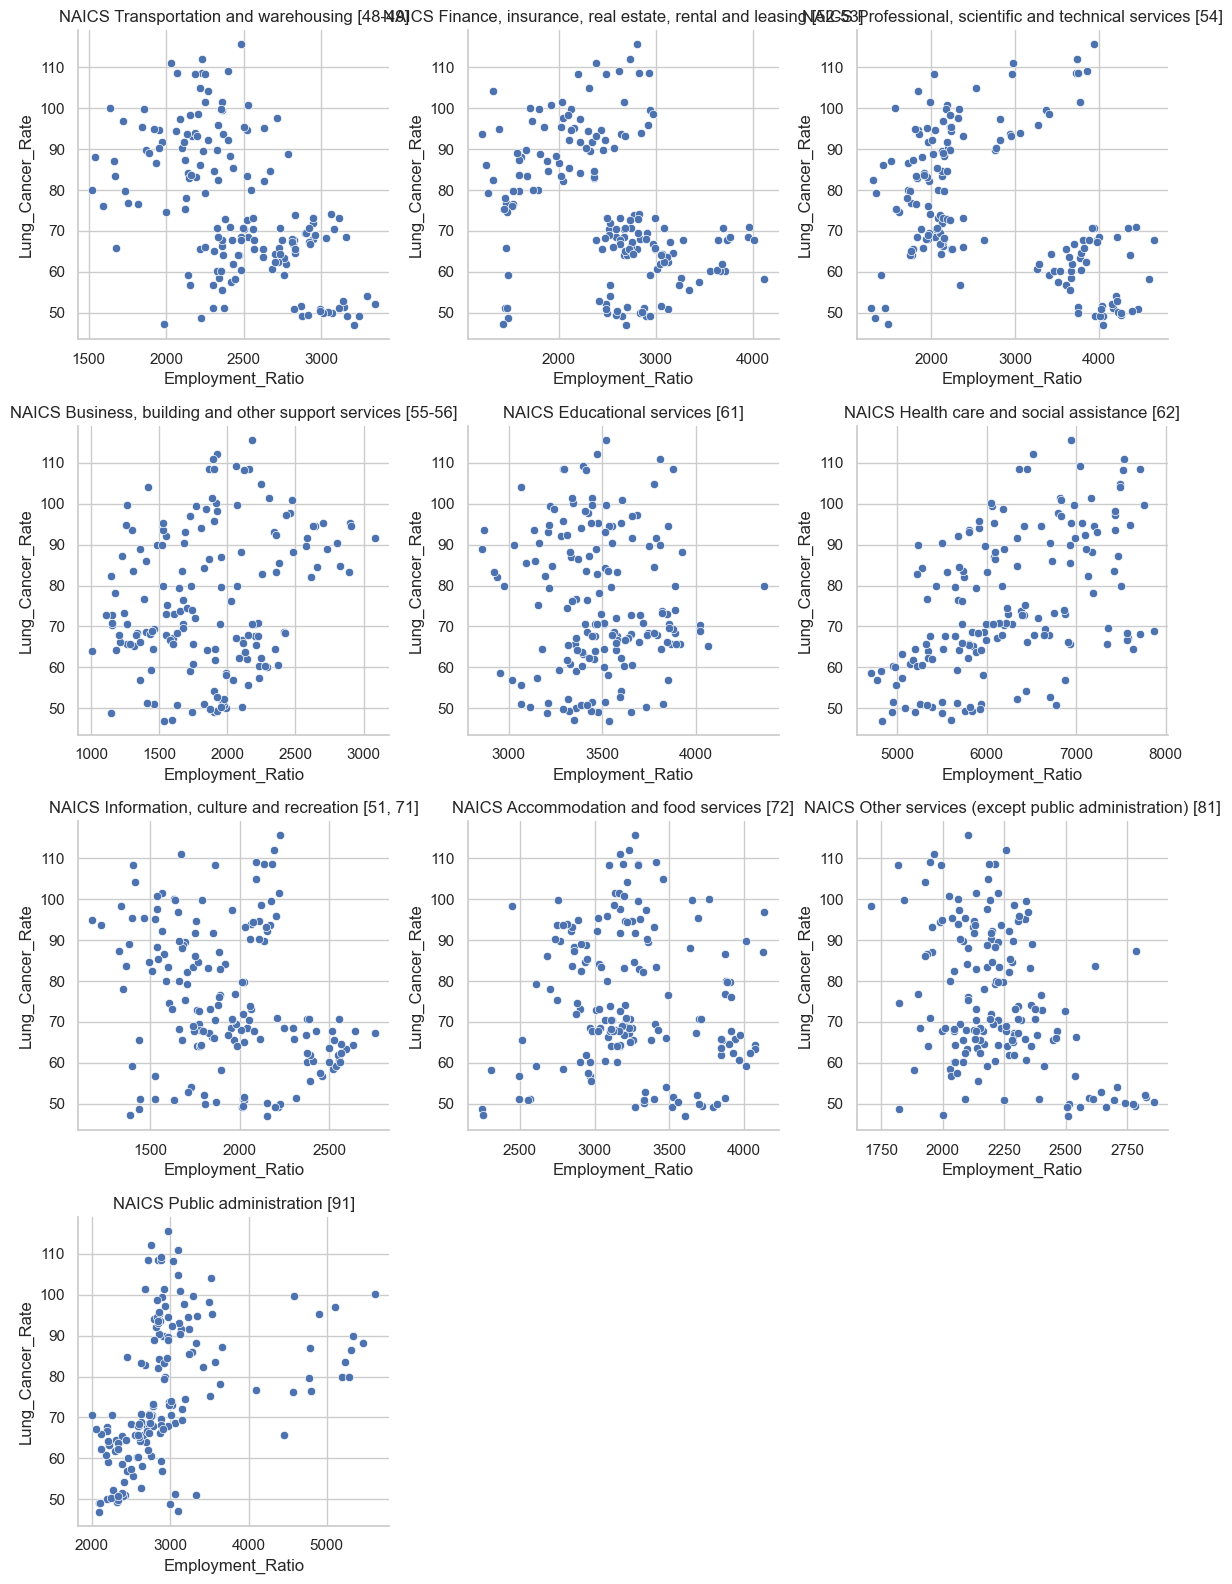

In [460]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

regression_result_list = []


# Ensure numeric data types and handle missing values
merged_df['Employment_Ratio'] = pd.to_numeric(merged_df['Employment_Ratio'], errors='coerce')
merged_df['Smoke_per_day'] = pd.to_numeric(merged_df['Smoke_per_day'], errors='coerce')
merged_df['Lung_Cancer_Rate'] = pd.to_numeric(merged_df['Lung_Cancer_Rate'], errors='coerce')

# Create a DataFrame to store regression results
regression_results = pd.DataFrame(columns=['NAICS', 'Intercept', 'Employment_Ratio', 'Smoke_per_day', 'Population', 'R-squared', 'p-value'])

# Set the style for the plots
sns.set(style="whitegrid")

# Split the DataFrame based on 'NAICS'
naics_values = merged_df['NAICS'].unique()
half_len = len(naics_values) // 2
naics_values_part1 = naics_values[:half_len]
naics_values_part2 = naics_values[half_len:]

def perform_regression_and_plot(subset_df, naics_values, g, part_num):
    for naics, ax in zip(naics_values, g.axes):
        subset_df = merged_df[merged_df['NAICS'] == naics]

        # Handle missing or infinite values
        subset_df = subset_df.replace([np.inf, -np.inf], np.nan)
        subset_df = subset_df.dropna(subset=['Employment_Ratio', 'Smoke_per_day', 'Lung_Cancer_Rate', 'Population'])

        # Multiple regression with 'Population' as a control variable
        X = sm.add_constant(subset_df[['Employment_Ratio', 'Smoke_per_day', 'Population']])
        y = subset_df['Lung_Cancer_Rate']

        model = sm.OLS(y, X).fit()
        regression_result_list.append(model)
        # Store results in the DataFrame for the current set
        result_row = {
            'NAICS': naics,
            'Intercept': model.params['const'],
            'Employment_Ratio': model.params['Employment_Ratio'],
            'Smoke_per_day': model.params['Smoke_per_day'],
            'Population': model.params['Population'],
            'R-squared': model.rsquared,
            'p-value': model.pvalues['Smoke_per_day']
        }
        global regression_results
        regression_results = pd.concat([regression_results, pd.DataFrame([result_row])], ignore_index=True)

        # Plot the scatter plot for the current set
        sns.scatterplot(x='Employment_Ratio', y='Lung_Cancer_Rate', data=subset_df, ax=ax)
        ax.set_title(f'NAICS {naics}')

    # Save the set of subplots
    plt.tight_layout()
    plt.savefig(f'results/scatter_plots_part{part_num}.png')
    plt.show()

# Create the first FacetGrid for the first set of subplots
g1 = sns.FacetGrid(merged_df[merged_df['NAICS'].isin(naics_values_part1)], col="NAICS", col_wrap=3, height=4, sharex=False, sharey=False)
perform_regression_and_plot(merged_df, naics_values_part1, g1, 1)

# Create the second FacetGrid for the second set of subplots
g2 = sns.FacetGrid(merged_df[merged_df['NAICS'].isin(naics_values_part2)], col="NAICS", col_wrap=3, height=4, sharex=False, sharey=False)
perform_regression_and_plot(merged_df, naics_values_part2, g2, 2)

# Display regression results
# print(regression_results)


In [461]:
model_names_list = regression_results[['NAICS']]

latex_table = model_names_list.style.to_latex()

# Print or save the LaTeX code

with open(result_yaml_file_path + 'industry_Latex_code.yaml', 'w') as file:
    yaml.dump(latex_table, file, default_flow_style=False)
print(latex_table)

\begin{tabular}{ll}
 & NAICS \\
0 & Total employed, all industries \\
1 & Goods-producing sector \\
2 & Agriculture [111-112, 1100, 1151-1152] \\
3 & Forestry, fishing, mining, quarrying, oil and gas [21, 113-114, 1153, 2100] \\
4 & Utilities [22] \\
5 & Construction [23] \\
6 & Manufacturing [31-33] \\
7 & Services-producing sector \\
8 & Wholesale and retail trade [41, 44-45] \\
9 & Transportation and warehousing [48-49] \\
10 & Finance, insurance, real estate, rental and leasing [52-53] \\
11 & Professional, scientific and technical services [54] \\
12 & Business, building and other support services [55-56] \\
13 & Educational services [61] \\
14 & Health care and social assistance [62] \\
15 & Information, culture and recreation [51, 71] \\
16 & Accommodation and food services [72] \\
17 & Other services (except public administration) [81] \\
18 & Public administration [91] \\
\end{tabular}



In [462]:
model_names_list = range(len(regression_result_list))
from statsmodels.iolib.summary2 import summary_col
dfoutput1 = summary_col(regression_result_list[:7], stars=True, model_names=model_names_list[:7]).as_latex()


with open(result_yaml_file_path + 'regression_result1.yaml', 'w') as file:
    yaml.dump(dfoutput1, file, default_flow_style=False)
print(dfoutput1)

\begin{table}
\caption{}
\label{}
\begin{center}
\begin{tabular}{llllllll}
\hline
                  & 0           & 1           & 2          & 3          & 4          & 5           & 6           \\
\hline
const             & 139.7872*** & 104.7895*** & 71.1319*** & 76.9219*** & 67.3453*** & 101.0975*** & 61.0601***  \\
                  & (25.2542)   & (13.1088)   & (12.2081)  & (11.2076)  & (13.2520)  & (14.7699)   & (11.9687)   \\
Employment\_Ratio & -0.0016***  & -0.0041***  & -0.0044*** & -0.0079*** & -0.0209*   & -0.0067***  & 0.0033***   \\
                  & (0.0004)    & (0.0006)    & (0.0011)   & (0.0012)   & (0.0108)   & (0.0014)    & (0.0011)    \\
Smoke\_per\_day   & 0.8724      & 1.3150*     & 1.0046     & 1.1532     & 1.3246     & 0.0337      & 0.3824      \\
                  & (0.7929)    & (0.7242)    & (0.7841)   & (0.7208)   & (0.8134)   & (0.8160)    & (0.8655)    \\
Population        & -0.0327     & -0.0608**   & -0.1199*** & -0.1747*** & -0.0785**  & -0.0784**   

In [463]:
dfoutput2 = summary_col(regression_result_list[7:13], stars=True, model_names=model_names_list[7:13]).as_latex()


with open(result_yaml_file_path + 'regression_result2.yaml', 'w') as file:
    yaml.dump(dfoutput2, file, default_flow_style=False)
print(dfoutput2)

\begin{table}
\caption{}
\label{}
\begin{center}
\begin{tabular}{lllllll}
\hline
                  & 7         & 8          & 9           & 10          & 11         & 12          \\
\hline
const             & 55.5360*  & 86.5221*** & 131.0246*** & 100.8941*** & 84.1514*** & 47.0910***  \\
                  & (32.3083) & (23.4215)  & (14.2166)   & (14.9020)   & (13.6860)  & (12.1781)   \\
Employment\_Ratio & 0.0001    & -0.0043    & -0.0221***  & -0.0141***  & -0.0075*** & 0.0103***   \\
                  & (0.0007)  & (0.0030)   & (0.0029)    & (0.0031)    & (0.0020)   & (0.0030)    \\
Smoke\_per\_day   & 1.4048*   & 1.6194*    & 0.0279      & 0.4522      & 0.6878     & 0.8675      \\
                  & (0.8435)  & (0.8230)   & (0.7188)    & (0.7917)    & (0.8014)   & (0.7982)    \\
Population        & -0.0751** & -0.0612*   & -0.0497*    & 0.1009**    & 0.0559     & -0.1051***  \\
                  & (0.0369)  & (0.0338)   & (0.0283)    & (0.0492)    & (0.0468)   & (0.0329)    \\
R-s

In [464]:
dfoutput3 = summary_col(regression_result_list[13:], stars=True, model_names=model_names_list[13:]).as_latex()


with open(result_yaml_file_path + 'regression_result3.yaml', 'w') as file:
    yaml.dump(dfoutput3, file, default_flow_style=False)
print(dfoutput3)

\begin{table}
\caption{}
\label{}
\begin{center}
\begin{tabular}{lllllll}
\hline
                  & 13         & 14          & 15         & 16         & 17          & 18          \\
\hline
const             & 74.4460*** & -90.1086*** & 80.3293*** & 69.4024*** & 137.6891*** & 33.9077***  \\
                  & (26.4722)  & (17.6064)   & (13.6388)  & (16.4376)  & (17.1726)   & (12.0856)   \\
Employment\_Ratio & -0.0039    & 0.0159***   & -0.0159*** & -0.0034    & -0.0330***  & 0.0094***   \\
                  & (0.0054)   & (0.0016)    & (0.0048)   & (0.0032)   & (0.0054)    & (0.0018)    \\
Smoke\_per\_day   & 1.1798     & 4.3520***   & 1.7414**   & 1.3442*    & 0.9746      & 0.9455      \\
                  & (0.8622)   & (0.7032)    & (0.7930)   & (0.8106)   & (0.7359)    & (0.7525)    \\
Population        & -0.0793**  & 0.0692**    & 0.0165     & -0.0775**  & -0.0890***  & -0.0055     \\
                  & (0.0336)   & (0.0295)    & (0.0418)   & (0.0329)   & (0.0297)    & (0.0328) 

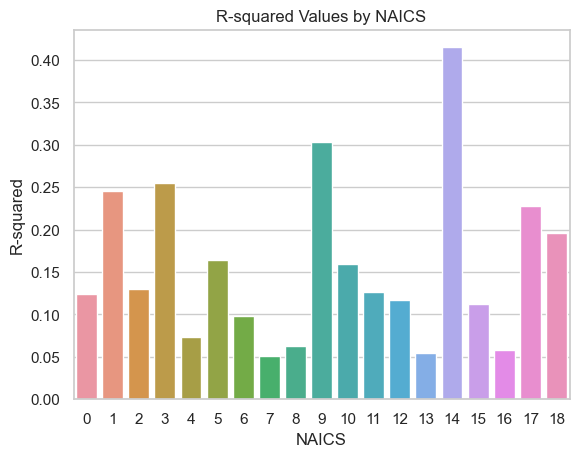

In [465]:
sns.barplot(x=regression_results.index, y='R-squared', data=regression_results)
plt.title('R-squared Values by NAICS')
plt.xlabel('NAICS')
plt.ylabel('R-squared')
plt.savefig('results/R_squre.png')
plt.show()

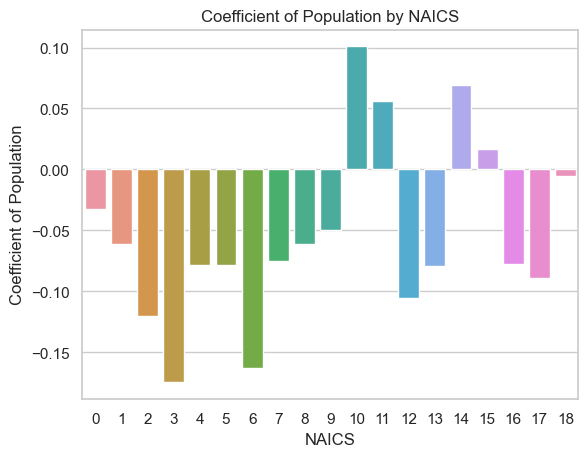

In [466]:
sns.barplot(x=regression_results.index, y='Population', data=regression_results)
plt.title('Coefficient of Population by NAICS')
plt.xlabel('NAICS')
plt.ylabel('Coefficient of Population')
# plt.axhline(y=0.05, color='red', linestyle='--', label='P=0.05')
# plt.legend()
plt.savefig('results/CoefficientOfPopulation.png')
plt.show()

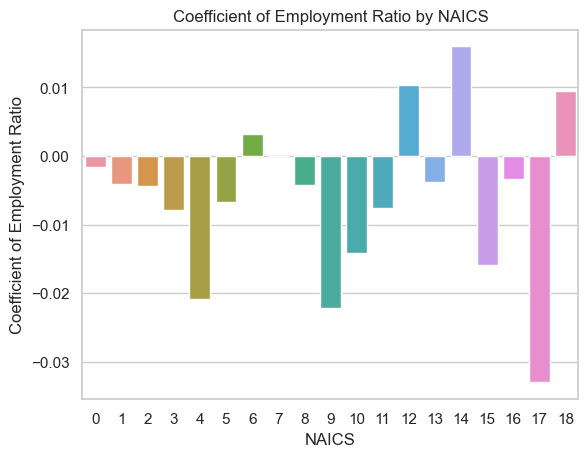

In [467]:
sns.barplot(x=regression_results.index, y='Employment_Ratio', data=regression_results)
plt.title('Coefficient of Employment Ratio by NAICS')
plt.xlabel('NAICS')
plt.ylabel('Coefficient of Employment Ratio')
# plt.axhline(y=0.05, color='red', linestyle='--', label='P=0.05')
# plt.legend()
plt.savefig('results/CoefficientOfEmploymentRatio.png')
plt.show()

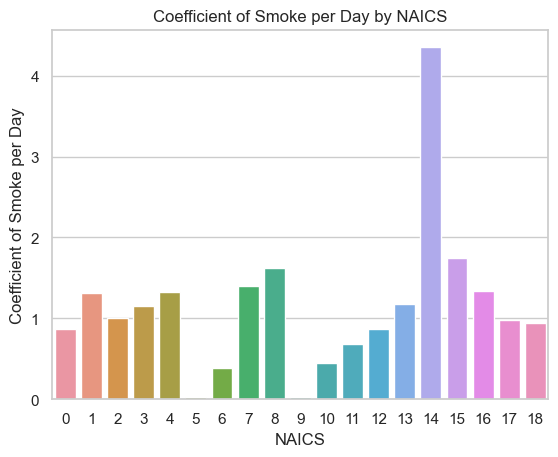

In [468]:
sns.barplot(x=regression_results.index, y='Smoke_per_day', data=regression_results)
plt.title('Coefficient of Smoke per Day by NAICS')
plt.xlabel('NAICS')
plt.ylabel('Coefficient of Smoke per Day')
# plt.axhline(y=0.05, color='red', linestyle='--', label='P=0.05')
# plt.legend()
plt.savefig('results/CoefficientOfSmokes.png')
plt.show()

# Source Yaml File

In [469]:

data = {
    'Smoke_Average.xlsx.dvc': {
        'obtained': '2023-11-16',
        'source': 'https://uwaterloo.ca/tobacco-use-canada/adult-tobacco-use/smoking-provinces',
        'description': 'TOBACCO USE IN CANADA'
    },
    
    'population.csv.dvc': {
        'obtained': '2023-11-17',
        'source': 'https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1710000901&cubeTimeFrame.startMonth=01&cubeTimeFrame.startYear=1999&cubeTimeFrame.endMonth=10&cubeTimeFrame.endYear=2022&referencePeriods=19990101%2C20221001',
        'description': 'Population estimates, quarterly'
    },
    'Production_Category.csv.dvc': {
        'obtained': '2023-11-17',
        'source': 'https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1410009201#archived',
        'description': 'Archived - Employment by industry, annual, provinces and economic regions, inactive (x 1,000)'
    },
    'Lung_Cancer.csv.dvc': {
        'obtained': '2023-11-17',
        'source': 'https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1310011101&pickMembers%5B0%5D=2.1&pickMembers%5B1%5D=3.1&pickMembers%5B2%5D=4.22&cubeTimeFrame.startYear=2016&cubeTimeFrame.endYear=2020&referencePeriods=20160101%2C20200101',
        'description': 'Number and rates of new cases of primary cancer, by cancer type, age group and sex'
    },
    'health_ineq_online_table_1.csv.dvc': {
        'obtained': '2023-10-13',
        'source': 'https://healthinequality.org/data/',
        'description': 'Chetty et al (JAMA 2016) Online Data Tables'
    },
    'health_ineq_online_table_2.csv.dvc': {
        'obtained': '2023-10-13',
        'source': 'https://healthinequality.org/data/',
        'description': 'Chetty et al (JAMA 2016) Online Data Tables'
    }
}

# Define the file path where you want to save the YAML file
yaml_file_path = 'data/raw/source.yaml'

# Write the data to a YAML file
with open(yaml_file_path, 'w') as file:
    yaml.dump(data, file, default_flow_style=False)

print(f'YAML data has been saved to {yaml_file_path}')

YAML data has been saved to data/raw/source.yaml
